# H2O Sonar Demo of Driverless AI MOJO Models

In [11]:
import os
import logging

import datatable
import daimojo
import webbrowser

from h2o_sonar import interpret
from h2o_sonar.lib.api import commons
from h2o_sonar.lib.api import explainers
from h2o_sonar.explainers import fi_naive_shapley_explainer as explainer
from h2o_sonar.lib.api.models import ModelApi

In [12]:
# explainer description
interpret.describe_explainer(explainer.NaiveShapleyMojoFeatureImportanceExplainer)

{'id': 'h2o_sonar.explainers.fi_naive_shapley_explainer.NaiveShapleyMojoFeatureImportanceExplainer',
 'name': 'NaiveShapleyMojoFeatureImportanceExplainer',
 'display_name': 'Shapley Values for Original Features of MOJO Models (Naive Method)',
 'description': 'Shapley values for original features of (Driverless AI) MOJO models are approximated from the accompanying Shapley values for transformed features with the Naive Shapley method. This method makes the assumption that input features to a transformer are independent. For example, if the transformed feature, feature1_feature2, has a Shapley value of 0.5, then the Shapley value of the original features feature1 and feature2 will be 0.25 each.',
 'model_types': ['iid'],
 'can_explain': ['regression', 'binomial', 'multinomial'],
 'explanation_scopes': ['global_scope', 'local_scope'],
 'explanations': [{'explanation_type': 'global-feature-importance',
   'name': 'GlobalFeatImpExplanation',
   'category': None,
   'scope': 'global',
   'ha

## Interpretation

In [13]:
# dataset
dataset_path = "../../data/creditcard.csv"
target_col = "default payment next month"

# model
mojo_path = "../../data/models/creditcard-binomial.mojo"
mojo_model = daimojo.model(mojo_path)
model = ModelApi().create_model(
    model_src=mojo_model,
    target_col=target_col,
    used_features=list(mojo_model.feature_names),
)

# results
results_location = "./results"
os.makedirs(results_location, exist_ok=True)

h2o_sonar.explainers.fi_naive_shapley_explainer.NaiveShapleyMojoFeatureImportanceExplainer: progress 20.0%
h2o_sonar.explainers.fi_naive_shapley_explainer.NaiveShapleyMojoFeatureImportanceExplainer: progress 90.0%
h2o_sonar.explainers.fi_naive_shapley_explainer.NaiveShapleyMojoFeatureImportanceExplainer: progress 90.0%


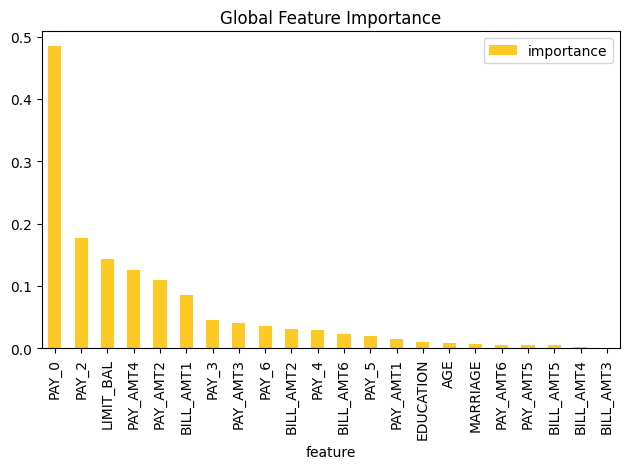

In [14]:
interpretation = interpret.run_interpretation(
    dataset=dataset_path,
    model=model,
    target_col=target_col,
    results_location=results_location,
    explainers=[explainer.NaiveShapleyMojoFeatureImportanceExplainer.explainer_id()],
    log_level=logging.INFO,
)

## Explainer Result

In [15]:
# retrieve the result
result = interpretation.get_explainer_result(
    explainer.NaiveShapleyMojoFeatureImportanceExplainer.explainer_id()
)

In [16]:
# open interpretation HTML report in web browser
webbrowser.open(interpretation.result.get_html_report_location())

True

In [17]:
# summary
result.summary()

{'id': 'h2o_sonar.explainers.fi_naive_shapley_explainer.NaiveShapleyMojoFeatureImportanceExplainer',
 'name': 'NaiveShapleyMojoFeatureImportanceExplainer',
 'display_name': 'Shapley Values for Original Features of MOJO Models (Naive Method)',
 'description': 'Shapley values for original features of (Driverless AI) MOJO models are approximated from the accompanying Shapley values for transformed features with the Naive Shapley method. This method makes the assumption that input features to a transformer are independent. For example, if the transformed feature, feature1_feature2, has a Shapley value of 0.5, then the Shapley value of the original features feature1 and feature2 will be 0.25 each.',
 'model_types': ['iid'],
 'can_explain': ['regression', 'binomial', 'multinomial'],
 'explanation_scopes': ['global_scope', 'local_scope'],
 'explanations': [{'explanation_type': 'global-feature-importance',
   'name': 'Shapley Values for Original Features of MOJO Models (Naive Method)',
   'cat

In [18]:
# Parameters
result.params()

{'sample_size': 100000, 'fast_approx_contribs': True}

### Display Data

In [19]:
result.data()

<Frame#7f89f5b4ca50 22x2>

### Plot Feature Importance Data

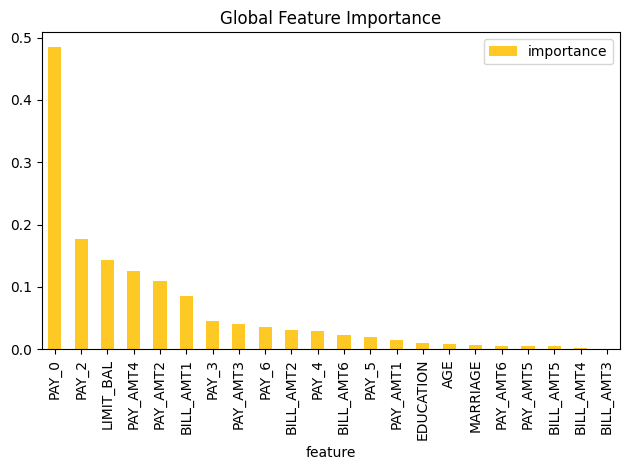

In [20]:
result.plot()

### Save Explainer Log and Data

In [21]:
# save the explainer log
log_file_path = "./feature-importance-demo.log"
result.log(path=log_file_path)

In [22]:
!cat $log_file_path

In [23]:
# save the explainer data
result.zip(file_path="./feature-importance-demo-archive.zip")

In [24]:
!unzip -l feature-importance-demo-archive.zip

Archive:  feature-importance-demo-archive.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     2991  2023-03-12 23:01   explainer_h2o_sonar_explainers_fi_naive_shapley_explainer_NaiveShapleyMojoFeatureImportanceExplainer_82328f62-beef-4d6b-baec-3bd17aef729f/result_descriptor.json
  1762120  2023-03-12 23:01   explainer_h2o_sonar_explainers_fi_naive_shapley_explainer_NaiveShapleyMojoFeatureImportanceExplainer_82328f62-beef-4d6b-baec-3bd17aef729f/work/shapley.orig.feat.bin
  1742542  2023-03-12 23:01   explainer_h2o_sonar_explainers_fi_naive_shapley_explainer_NaiveShapleyMojoFeatureImportanceExplainer_82328f62-beef-4d6b-baec-3bd17aef729f/work/shapley_formatted_orig_feat.zip
  4693127  2023-03-12 23:01   explainer_h2o_sonar_explainers_fi_naive_shapley_explainer_NaiveShapleyMojoFeatureImportanceExplainer_82328f62-beef-4d6b-baec-3bd17aef729f/work/shapley.orig.feat.csv
    40216  2023-03-12 23:01   explainer_h2o_sonar_explainers_fi_naive_shapley_explainer_NaiveShapl